In [47]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the Data**

In [48]:
df=pd.read_csv('3. Pratice set 1 Titanictrain.csv')

**Check Head**

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check Info**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Check a few measures of descriptive statistics**

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Of all passengers in df, how many survived, how many died ?**

In [59]:
survived=df[df['Survived']==1]['Survived'].count()
print('No of Passengers survived were:',survived)
died=df[df['Survived']==0]['Survived'].count()
print('No of Passengers died were:',died)

No of Passengers survived were: 342
No of Passengers died were: 549


**Check the % of people who have survived.**

In [63]:
percent_survived=survived/df['Survived'].count()*100
percent_survived

38.38383838383838

**Which Gender survived the crash more?**
**Male or Female?**

In [76]:
Gender_survived=df[df['Survived']==1]['Sex'].value_counts()
Gender_survived

female    233
male      109
Name: Sex, dtype: int64

**Visualize the above numbers**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

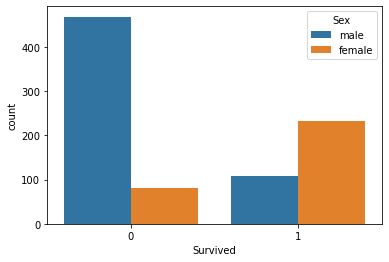

In [69]:
sns.countplot(df['Survived'],hue=df['Sex'])

**The percentage of men and women who survived the crash are?**

In [84]:
men_pcent=Gender_survived[1]/df[df['Sex']=='male']['Sex'].count()
print('percentage of men who survived the crash are',round(men_pcent*100,2),'%')
women_pcent=Gender_survived[0]/df[df['Sex']=='female']['Sex'].count()
print('percentage of female who survived the crash are',round(women_pcent*100,2),'%')

percentage of men who survived the crash are 18.89 %
percentage of female who survived the crash are 74.2 %


**Visualize the above % gender wise**

Make pie chart

Text(0.5, 1.0, 'Survival of women')

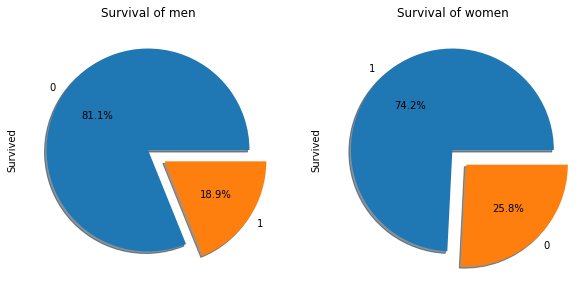

In [85]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,9))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=axs[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=axs[1],shadow=True)
axs[0].set_title('Survival of men')
axs[1].set_title('Survival of women')

**Plot a table of `Pclass` and `Survived` variable**

In [86]:
pd.crosstab(df['Pclass'],df['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**Check the proportion of passengers who survived from different Ticket Classes**

In [108]:
print('Pclass 1:',df['Survived'][df['Pclass']==1].sum()/df['Survived'][df['Pclass']==1].count())
print('Pclass 2:',df['Survived'][df['Pclass']==2].sum()/df['Survived'][df['Pclass']==2].count())
print('Pclass 3:',df['Survived'][df['Pclass']==3].sum()/df['Survived'][df['Pclass']==3].count())

Pclass 1: 0.6296296296296297
Pclass 2: 0.47282608695652173
Pclass 3: 0.24236252545824846


**Plot the fraction of passengers survived against their Ticket Class**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

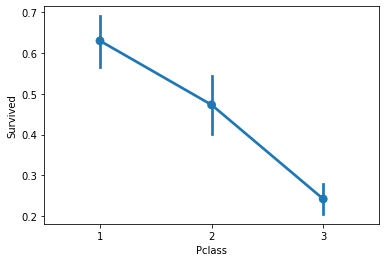

In [110]:
sns.pointplot(df['Pclass'],df['Survived'])

The above graph has plotted the confidence interval.
Let us remove the confidence intervals and try to plot it once more.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

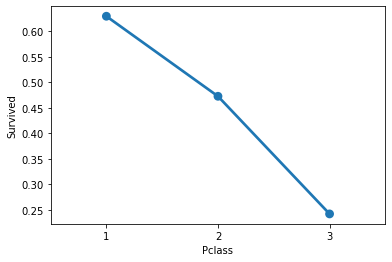

In [111]:
sns.pointplot(df['Pclass'],df['Survived'],ci=False)

**Plot a table of `Sex`,`Pclass` and `Survived` variable**

In [123]:
pd.crosstab(columns=df['Pclass'],index=[df['Sex'],df['Survived']],margins=True).style.background_gradient('autumn_r')

**Plot the proportion of people who survived the crash of the ship keeping the gender in mind**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

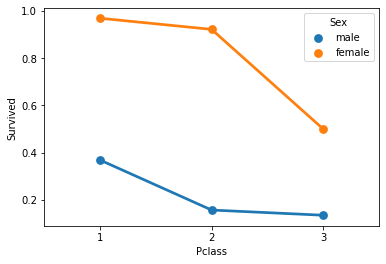

In [128]:
sns.pointplot(df['Pclass'],df['Survived'],hue=df['Sex'],ci=False)

**Make a countplot for `Survived` and `Embarked` variables**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

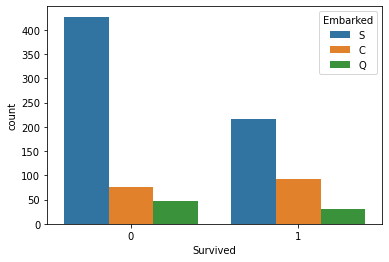

In [130]:
sns.countplot(df['Survived'],hue=df['Embarked'])

**Make a point plot for `Survived` and `Embarked` variables**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

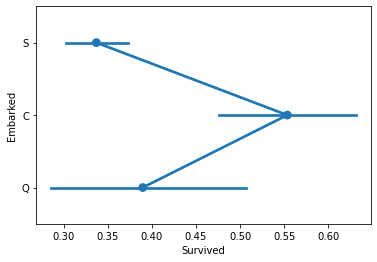

In [133]:
sns.pointplot(df['Survived'],df['Embarked'])

**Make a point plot for `Survived`,`Embarked` and `Sex` variables**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

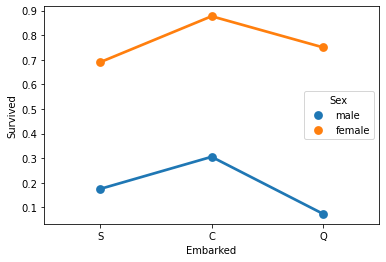

In [136]:
sns.pointplot(df['Embarked'],df['Survived'],hue=df['Sex'],ci=False)

**Make a point plot for `Survived`,`Embarked`,`Sex`, and `Pclass` variables**

**Make a table of `Sex`,`Pclass`,`Embarked`,`Survived` variables**

**Check the distribution of the fare**

**Make the point plot of `Survived`,`Sex`, `Pclass`**

**Plot the proportion of siblings / spouses aboard the Titanic who have survived.**

Let us check the correlation among various values.

**Make the 'heatmap' of Correlation**

<AxesSubplot:>

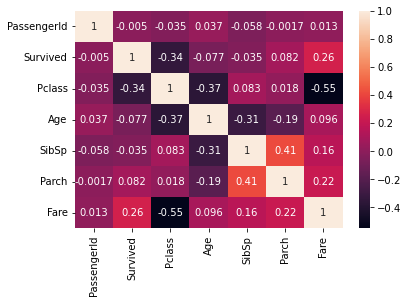

In [149]:
corr=df.corr()
sns.heatmap(corr,annot=True)

                                                Happy Learning